<a href="https://colab.research.google.com/github/Kathi3/SQL-MiniProject/blob/main/SQL_mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
##
##
root_dir = '/content/drive/Mydrive'
folder = '/content/drive/Mydrive/sql'



## **CONNECTING TO SQL DATABASE**

In [3]:
#Loading the SQL extension to the environment
#Connecting SQl lite memory database
%load_ext sql
%sql sqlite://

'Connected: @None'

## **IMPORTING LIBRARIES**

In [4]:
#importing pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# **DATASET LOADING**

**Load dataset into pandas dataframe.**

In [6]:
#Importing the population datasets

population_df=pd.read_csv('Population_by_state.csv')
population_df.head()


,State,Population
0,CALIFORNIA,39144818
1,TEXAS,27469114
2,FLORIDA,20271272
3,NEW YORK,19795791
4,ILLINOIS,12859995


In [7]:
#Importing the grand electors datasets
grand_electors=pd.read_csv('GrandElectors_by_state.csv')
grand_electors.head()

,State,GrandElectors
0,Alabama,9
1,Alaska,3
2,Arizona,11
3,Arkansas,6
4,California,55


**Save datasets in SQL dataframe.**

In [8]:
#Uploading the GrandElectors Dataset to SQL dataframe
#Droping any exsiting table named GrandElectors in our Database
#Previewing the Table

with open('/content/GrandElectors_by_state.csv','r') as f:
    GrandElectors = pd.read_csv(f, index_col=0, encoding='utf-8')
%sql DROP TABLE if EXISTS GrandElectors;
%sql PERSIST GrandElectors;
%sql SELECT * FROM GrandElectors LIMIT 5;

 * sqlite://
Done.
 * sqlite://
 * sqlite://
Done.


State,GrandElectors
Alabama,9
Alaska,3
Arizona,11
Arkansas,6
California,55


In [9]:
#Uploading the population Dataset to SQL dataframe
#Droping any exsiting table named Population in our Database
#Previewing the Table

import pandas as pd 

with open('/content/Population_by_state.csv','r') as f:
    Population = pd.read_csv(f, index_col=0, encoding='utf-8')
%sql DROP TABLE if EXISTS Population;
%sql PERSIST Population;
%sql SELECT * FROM Population LIMIT 5;

 * sqlite://
Done.
 * sqlite://
 * sqlite://
Done.


State,Population
CALIFORNIA,39144818
TEXAS,27469114
FLORIDA,20271272
NEW YORK,19795791
ILLINOIS,12859995


# **DATA UNDERSTANDING**

In [10]:
# Getting to know more about the grandelectors data-set.
#Like the data-types currently in use since by both escpecially in an event we need to convert the data formats.
Population.columns.values

array(['Population'], dtype=object)

In [11]:
# Finding the value count of the grand electors dataset
GrandElectors["GrandElectors"].value_counts()

3     8
6     6
4     5
11    4
10    4
9     3
5     3
7     3
29    2
20    2
16    2
8     2
55    1
38    1
13    1
14    1
15    1
18    1
12    1
Name: GrandElectors, dtype: int64

In [12]:
# Getting to know the value count of the population dataset
population_df["Population"].value_counts() 

1896190     1
586107      1
6794422     1
52344       1
1431603     1
10042802    1
27469114    1
1330608     1
3911338     1
2085109     1
1056298     1
20271272    1
6828065     1
1844128     1
2978204     1
2911641     1
1654930     1
103574      1
4425092     1
4896146     1
8382993     1
9922576     1
945934      1
7170351     1
3474182     1
4670724     1
6006401     1
5489594     1
3123899     1
8958013     1
672228      1
626042      1
161785      1
54343       1
1032949     1
39144818    1
2995919     1
11613423    1
6600299     1
858469      1
3590886     1
6619680     1
4858979     1
5456574     1
19795791    1
1329328     1
2890845     1
12859995    1
6083672     1
4028977     1
2992333     1
10214860    1
5771337     1
12802503    1
756927      1
738432      1
Name: Population, dtype: int64

In [13]:
#checking null values and data-info in population dataset
population_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   State       56 non-null     object
 1   Population  56 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.0+ KB


In [14]:
#checking null values and data-info in grand_electors dataset
grand_electors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   State          51 non-null     object
 1   GrandElectors  51 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 944.0+ bytes


In [15]:
%%sql
PRAGMA table_info(GrandElectors);

 * sqlite://
Done.


cid,name,type,notnull,dflt_value,pk
0,State,TEXT,0,None,0
1,GrandElectors,BIGINT,0,None,0


In [16]:
%%sql
PRAGMA table_info(Population);

 * sqlite://
Done.


cid,name,type,notnull,dflt_value,pk
0,State,TEXT,0,None,0
1,Population,BIGINT,0,None,0


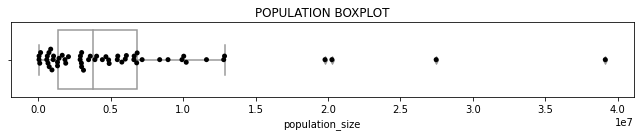

In [17]:

#checking outliers of population dataset using boxplot and swarmplot
#unusual but normal partof the data
plt.figure(figsize=(9,2))
plot=sns.boxplot(x='Population',data=population_df,color='white')
plot=sns.swarmplot(x='Population',data=population_df,color='black')
plt.title('POPULATION BOXPLOT',fontsize=12)
plt.xlabel('population_size')
plt.tight_layout()

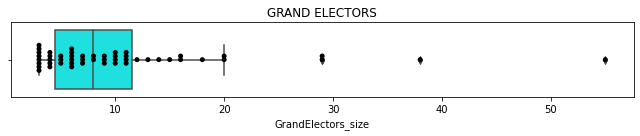

In [18]:
#checking outliers of grand electors dataset using boxplot and swarmplot


plt.figure(figsize=(9,2))
plot=sns.boxplot(x='GrandElectors',data=grand_electors,color='cyan')
plot=sns.swarmplot(x='GrandElectors',data=grand_electors,color='black')
plt.title('GRAND ELECTORS',fontsize=12)
plt.xlabel('GrandElectors_size')
plt.tight_layout()

#**DATA CLEANING**

In [19]:
#Converting the attributes in the State Column from GrandElectors Table to Uppercase 
#
%%sql
UPDATE GrandElectors
SET state = UPPER(state)

 * sqlite://
51 rows affected.


[]

In [20]:
#Joining the two tables together
#Creating a new table to store the attributes of the joined tables 
%%sql
CREATE TABLE ELECTIONS AS SELECT State, Population, GrandElectors
FROM (SELECT * FROM Population
INNER JOIN GrandElectors ON Population.State = GrandElectors.State)

 * sqlite://
Done.


[]

In [21]:
#Preview of the table created 
%%sql
SELECT * FROM ELECTIONS LIMIT 10

 * sqlite://
Done.


State,Population,GrandElectors
CALIFORNIA,39144818,55
TEXAS,27469114,38
FLORIDA,20271272,29
NEW YORK,19795791,29
ILLINOIS,12859995,20
PENNSYLVANIA,12802503,20
OHIO,11613423,18
GEORGIA,10214860,16
NORTH CAROLINA,10042802,15
MICHIGAN,9922576,16


In [22]:
#Changing the name of the District of Columbia to its short form "DC"

%%sql
UPDATE ELECTIONS
SET State = "DC"
WHERE STATE = "DISTRICT OF COLUMBIA"

 * sqlite://
1 rows affected.


[]

# **DATA EXPLORATION AND MODELING**

### **Computations**

In [23]:
#computing the ratio between the number of grand electors and the population.
#Then creating a new column to display the ratio

%%sql
ALTER TABLE ELECTIONS ADD Ratio float(20)

 * sqlite://
Done.


[]

In [25]:
#Previewing the Changes made

%%sql 
SELECT * FROM ELECTIONS limit 10


 * sqlite://
Done.


State,Population,GrandElectors,Ratio
CALIFORNIA,39144818,55,None
TEXAS,27469114,38,None
FLORIDA,20271272,29,None
NEW YORK,19795791,29,None
ILLINOIS,12859995,20,None
PENNSYLVANIA,12802503,20,None
OHIO,11613423,18,None
GEORGIA,10214860,16,None
NORTH CAROLINA,10042802,15,None
MICHIGAN,9922576,16,None


In [26]:
#Computing the ratios and updating the Ratios column 
#Odering the states by decreasing ratio, making the priority list
#
#
%%sql
UPDATE ELECTIONS
SET "Ratio" = Population/GrandElectors;
SELECT * FROM ELECTIONS
ORDER BY Ratio DESC limit 10;


 * sqlite://
51 rows affected.
Done.


State,Population,GrandElectors,Ratio
TEXAS,27469114,38,722871.0
CALIFORNIA,39144818,55,711723.0
FLORIDA,20271272,29,699009.0
NEW YORK,19795791,29,682613.0
NORTH CAROLINA,10042802,15,669520.0
OHIO,11613423,18,645190.0
VIRGINIA,8382993,13,644845.0
ILLINOIS,12859995,20,642999.0
PENNSYLVANIA,12802503,20,640125.0
NEW JERSEY,8958013,14,639858.0


### Computing Totals

In [27]:
#Computing the running Total of GrandElectors in the sorted list
#
%%sql
CREATE TABLE G_Cummulative AS
SELECT
      t.State,t.GrandElectors,t.Population,t.Ratio,
      (SELECT Sum(r.GrandElectors) FROM ELECTIONS as r WHERE t.Ratio <=r.Ratio) AS Cummulative 
    FROM ELECTIONS as t 
    GROUP BY t.Ratio ORDER BY t.Ratio DESC; 

 * sqlite://
Done.


[]

In [28]:
##Previweing the Running totals
#
%%sql
SELECT * FROM G_Cummulative;

 * sqlite://
Done.


State,GrandElectors,Population,Ratio,Cummulative
TEXAS,38,27469114,722871.0,38
CALIFORNIA,55,39144818,711723.0,93
FLORIDA,29,20271272,699009.0,122
NEW YORK,29,19795791,682613.0,151
NORTH CAROLINA,15,10042802,669520.0,166
OHIO,18,11613423,645190.0,184
VIRGINIA,13,8382993,644845.0,197
ILLINOIS,20,12859995,642999.0,217
PENNSYLVANIA,20,12802503,640125.0,237
NEW JERSEY,14,8958013,639858.0,251


In [29]:
#Independently computing the half of the total of Grand Electors overall (in the whole country):
#
%%sql
SELECT SUM(GrandElectors)/2 from ELECTIONS

 * sqlite://
Done.


SUM(GrandElectors)/2
269


### **Filtering the sorted list**

In [30]:
#filtering  our sorted list of states in order to keep only the (top) ones 
# enabling us to reach the computed threshold. (the other states are ignored).
%%sql 
SELECT a1.State, a1.GrandElectors, SUM(a2.GrandElectors) Running_Total
FROM ELECTIONS a1, ELECTIONS a2
WHERE a1.GrandElectors <= a2.GrandElectors or (a1.GrandElectors = a2.GrandElectors and a1.State = a2.State)
GROUP BY a1.State, a1.GrandElectors
ORDER BY a1.GrandElectors DESC, a1.State DESC;

 * sqlite://
Done.


State,GrandElectors,Running_Total
CALIFORNIA,55,55
TEXAS,38,93
NEW YORK,29,151
FLORIDA,29,151
PENNSYLVANIA,20,191
ILLINOIS,20,191
OHIO,18,209
MICHIGAN,16,241
GEORGIA,16,241
NORTH CAROLINA,15,256


 * sqlite://
Done.


State,GrandElectors,Running_Total
CALIFORNIA,55,55
TEXAS,38,93
NEW YORK,29,151
FLORIDA,29,151
PENNSYLVANIA,20,191
ILLINOIS,20,191
OHIO,18,209
MICHIGAN,16,241
GEORGIA,16,241
NORTH CAROLINA,15,256


# **EVALUATION**

In [31]:
#Target List

%%sql
SELECT a1.State, a1.GrandElectors, SUM(a2.GrandElectors) Running_Total
FROM ELECTIONS a1, ELECTIONS a2
WHERE a1.GrandElectors <= a2.GrandElectors or (a1.GrandElectors=a2.GrandElectors and a1.State = a2.State)
GROUP BY a1.State, a1.GrandElectors
ORDER BY a1.GrandElectors DESC, a1.State DESC
LIMIT 11

 * sqlite://
Done.


State,GrandElectors,Running_Total
CALIFORNIA,55,55
TEXAS,38,93
NEW YORK,29,151
FLORIDA,29,151
PENNSYLVANIA,20,191
ILLINOIS,20,191
OHIO,18,209
MICHIGAN,16,241
GEORGIA,16,241
NORTH CAROLINA,15,256


Our target list shows that we will need to prioritize 11 states namely: California, Texas, New York, Florida, Pennsylvania, Illinois, Ohio, Michigan, Georgia, North Carolina and New Jersey. To have a sure win, the campaign team can also target the 12th state i.e. Virginia. 